# Analysis Report

Team 3

Names: Alejandro Otaola, Alexander Daughters, Jason Fearnall, Finn Mikkola

# Introduction:

At the request of Mr. Richardo, the owner of the restaurant, Team 3 has conducted an analytical assessment of the restaurant's database. Our examination revealed the presence of null values, outliers, and duplicate data within the database records. We proceeded to clean the data. Leveraging Python dataframes, we were able to make the database records into a more uniform and unique data. This report aims to provide insights into the refined data, offering information on how the database is structured for informed decision-making within the restaurant's operations.

# Data Quality Assessment and Cleanup:

In order to conduct a comprehensive analysis, Team 3 initiated the process by consolidating separate data spread across two .csv files and one .yaml file. The merging of these tables into a singular, unified dataset was accomplished through a meticulous procedure, aligning entries based on the unique customer ID. Concurrently, our team conducted an in-depth data quality assessment, addressing issues such as duplicates, outliers, and null values. Records bearing duplications were deleted so that only one record remained,while outliers and nulls were asessed to make sure that we deleted only ones that made sense to delete, ensuring a more consise and managable dataset for analysis. Following this, the refined dataset was integrated into a database file using the .to_sql method in Python. The dataset was saved as tables in a .db file, providing a convenient storage solution. The data was organized into distinct tables – 'orders,' 'credit_cards,' 'customer_info,' and 'customer_stats.' This makes the data for each table easy to obtain if needed by itself or as a whole. This organizational schema optimizes data retrieval and analysis, offering a more focused use of the categories within the broader restaurant database.

# run this cell to get information for graphs to use

In [47]:
import pandas as pd
from sqlalchemy import create_engine

# SQLite database connection string
engine = create_engine('sqlite:///PEP1_db.db')

# Query the data from the database into a DataFrame
table_name = 'orders'
query = f'SELECT * FROM {table_name}'
orders_df = pd.read_sql(query, con=engine)

table_name = 'credit_cards'
query = f'SELECT * FROM {table_name}'
CC_df = pd.read_sql(query, con=engine)

table_name = 'customer_info'
query = f'SELECT * FROM {table_name}'
cust_info = pd.read_sql(query, con=engine)

table_name = 'customer_stats'
query = f'SELECT * FROM {table_name}'
cust_stats = pd.read_sql(query, con=engine)

#orders_df.customer_id == cust_info.customer_id == cust_stats.customer_id
#customer_info.credit_card_id == credit_cards.credit_card_id
merged_data = pd.merge(orders_df, cust_info, how='left', on='customer_id')
merged_data = pd.merge(merged_data, cust_stats, how='left', on='customer_id')
merged_data = pd.merge(merged_data, CC_df, how='left', on='credit_card_id')



# Data Analysis: 

In this section, our focus shifts to an exploration of the restaurant's dataset. Looking at some of the statistics, we aim to unravel some key insights within the data. Bar graphs are used to visualize the some helpful information for Ricardo's.

In [59]:
avg_spent = merged_data['total_spent'].mean()
print("Customers spend and average of $", round(avg_spent), " on their orders.", sep = '')

Customers spend and average of $521 on their orders.


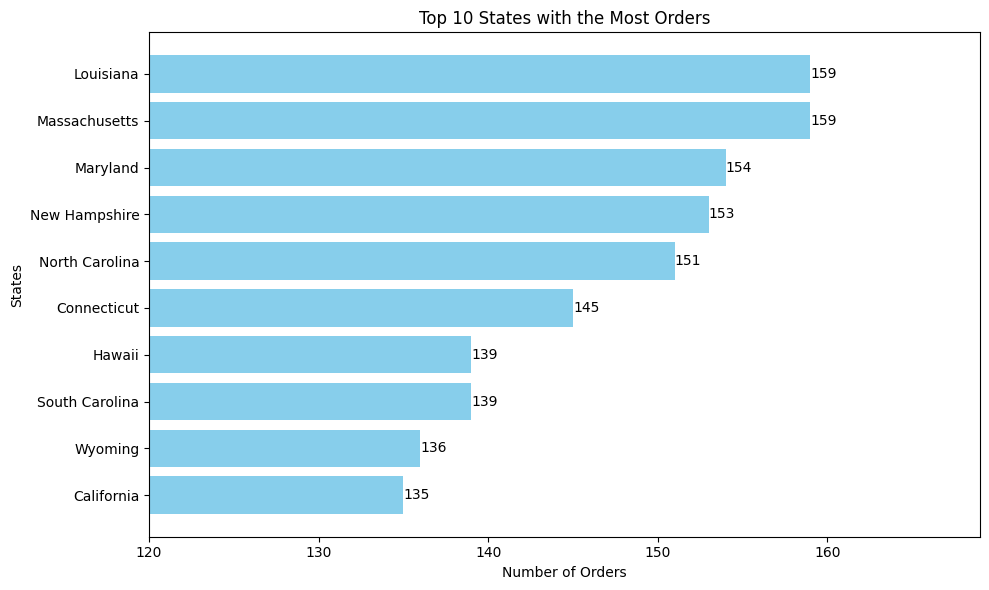

In [48]:
import matplotlib.pyplot as plt
order_counts = merged_data.groupby("state")["order_id"].nunique()
top_states = order_counts.nlargest(10)

# Data
states = top_states.index.tolist()
orders = top_states.tolist()

# Reverse the order of data
states = states[::-1]
orders = orders[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states, orders, color='skyblue')
plt.title('Top 10 States with the Most Orders')
plt.xlabel('Number of Orders')
plt.ylabel('States')

# Set x-axis limits to start at 150
plt.xlim(120, max(orders) + 10)  # Adjust the upper limit based on your data

for bar, order in zip(bars, orders):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')


# Show the plot
plt.tight_layout()
plt.show()


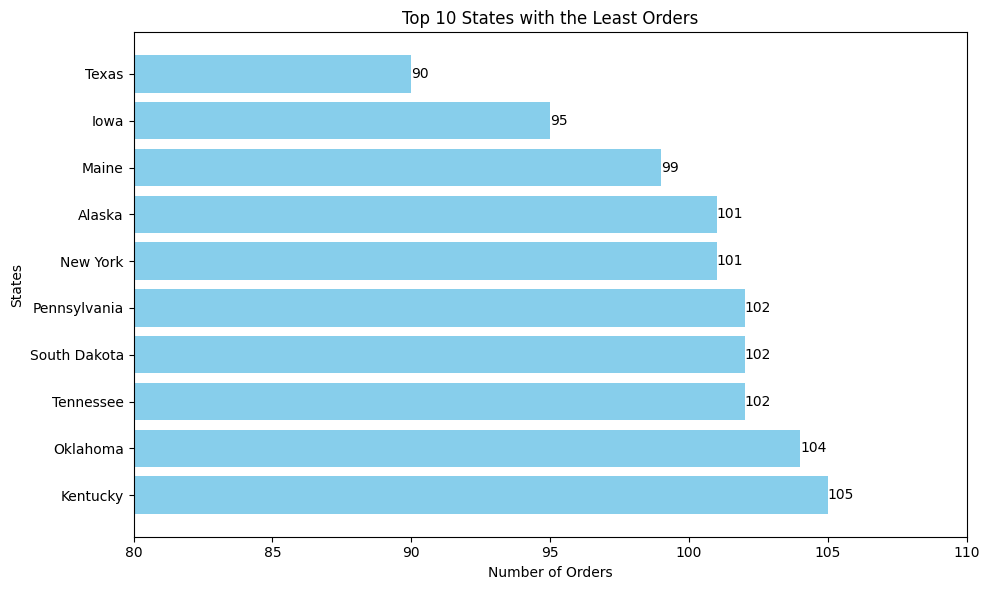

In [49]:
order_counts = merged_data.groupby("state")["order_id"].nunique()
top_states = order_counts.nsmallest(10)

# Data
states = top_states.index.tolist()
orders = top_states.tolist()

#reverse
states = states[::-1]
orders = orders[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states, orders, color='skyblue')
plt.title('Top 10 States with the Least Orders')
plt.xlabel('Number of Orders')
plt.ylabel('States')

# Set x-axis limits to start at 150
plt.xlim(80, 110)  # Adjust the upper limit based on your data

for bar, order in zip(bars, orders):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()


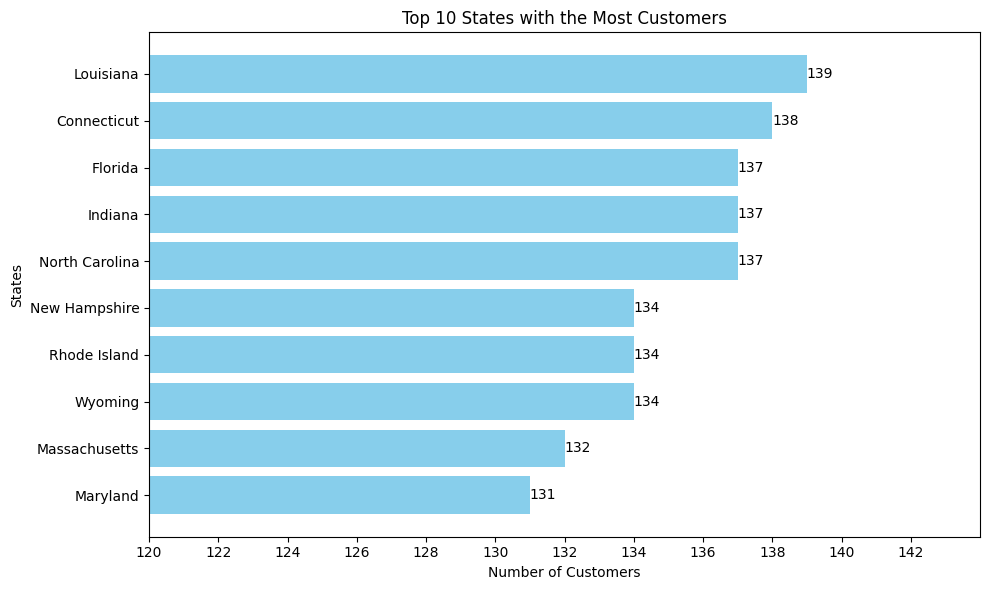

In [50]:
customer_counts = merged_data.groupby("state")["customer_id"].nunique()
top_states = customer_counts.nlargest(10)

# New Data
states_new = top_states.index.tolist()
customers = top_states.tolist()

# Reverse the order of new data
states_new = states_new[::-1]
customers = customers[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states_new, customers, color='skyblue')
plt.title('Top 10 States with the Most Customers')
plt.xlabel('Number of Customers')
plt.ylabel('States')

# Set x-axis limits to start at 100
plt.xlim(120, max(customers) + 5)  # Adjust the upper limit based on your data

# Display numbers on each bar
for bar, order in zip(bars, customers):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')

# Set x-axis ticks to show only whole numbers
plt.xticks(range(120, max(customers) + 5, 2))

# Show the plot
plt.tight_layout()
plt.show()

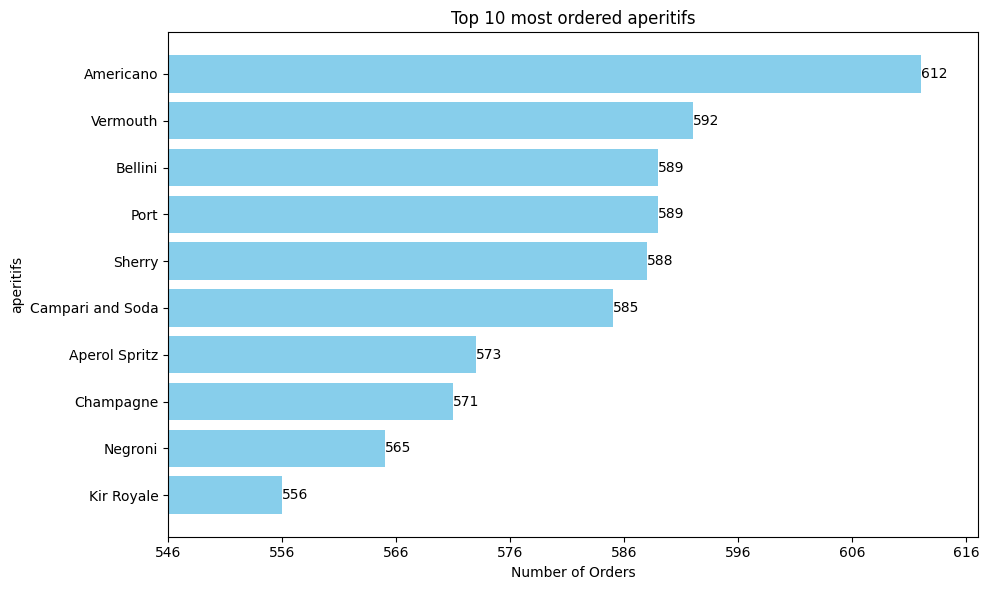

In [51]:
counts = merged_data.groupby("aperitifs")["order_id"].nunique()
top_aperitifs = counts.nlargest(10)

# New Data
states_new = top_aperitifs.index.tolist()
aperitifs = top_aperitifs.tolist()

# Reverse the order of new data
states_new = states_new[::-1]
aperitifs = aperitifs[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states_new, aperitifs, color='skyblue')
plt.title('Top 10 most ordered aperitifs')
plt.xlabel('Number of Orders')
plt.ylabel('aperitifs')

# Set x-axis limits to start at 100
plt.xlim(min(aperitifs) - 10, max(aperitifs) + 5)  # Adjust the upper limit based on your data

# Display numbers on each bar
for bar, order in zip(bars, aperitifs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')

# Set x-axis ticks to show only whole numbers
plt.xticks(range(min(aperitifs) - 10, max(aperitifs) + 5, 10))

# Show the plot
plt.tight_layout()
plt.show()

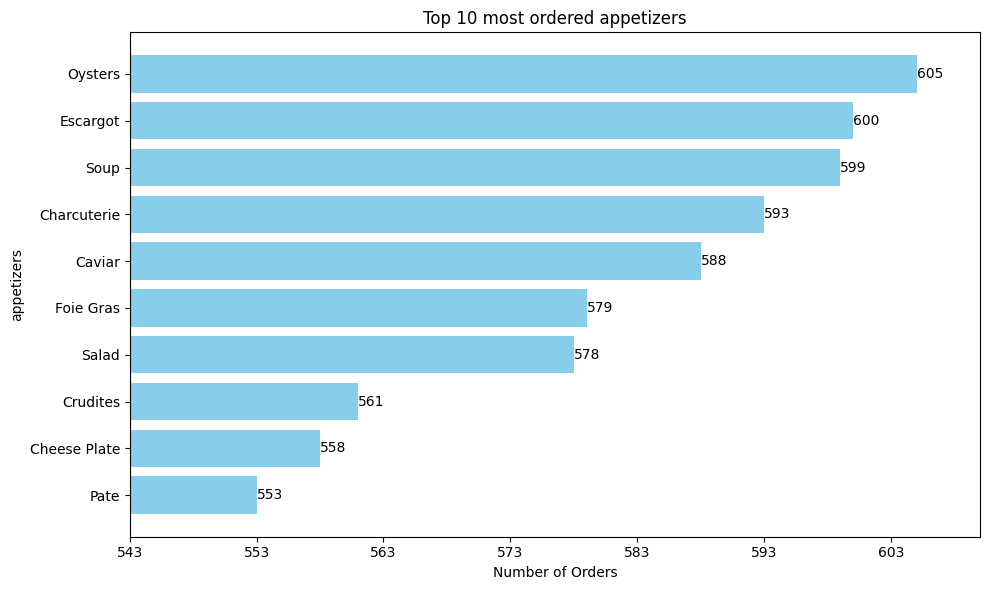

In [57]:
counts = merged_data.groupby("appetizers")["order_id"].nunique()
top = counts.nlargest(10)

# New Data
states_new = top.index.tolist()
appetizers = top.tolist()

# Reverse the order of new data
states_new = states_new[::-1]
appetizers = appetizers[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states_new, appetizers, color='skyblue')
plt.title('Top 10 most ordered appetizers')
plt.xlabel('Number of Orders')
plt.ylabel('appetizers')

# Set x-axis limits to start at 100
plt.xlim(min(appetizers) - 10, max(appetizers) + 5)  # Adjust the upper limit based on your data

# Display numbers on each bar
for bar, order in zip(bars, appetizers):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')

# Set x-axis ticks to show only whole numbers
plt.xticks(range(min(appetizers) - 10, max(appetizers) + 5, 10))

# Show the plot
plt.tight_layout()
plt.show()

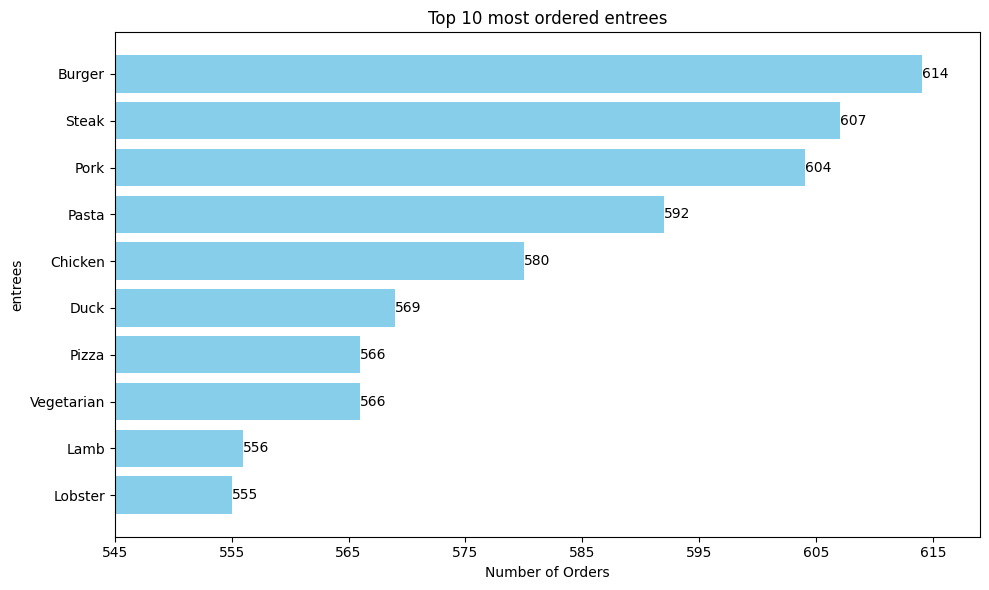

In [52]:
counts = merged_data.groupby("entrees")["order_id"].nunique()
top = counts.nlargest(10)

# New Data
states_new = top.index.tolist()
entrees = top.tolist()

# Reverse the order of new data
states_new = states_new[::-1]
entrees = entrees[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states_new, entrees, color='skyblue')
plt.title('Top 10 most ordered entrees')
plt.xlabel('Number of Orders')
plt.ylabel('entrees')

# Set x-axis limits to start at 100
plt.xlim(min(entrees) - 10, max(entrees) + 5)  # Adjust the upper limit based on your data

# Display numbers on each bar
for bar, order in zip(bars, entrees):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')

# Set x-axis ticks to show only whole numbers
plt.xticks(range(min(entrees) - 10, max(entrees) + 5, 10))

# Show the plot
plt.tight_layout()
plt.show()

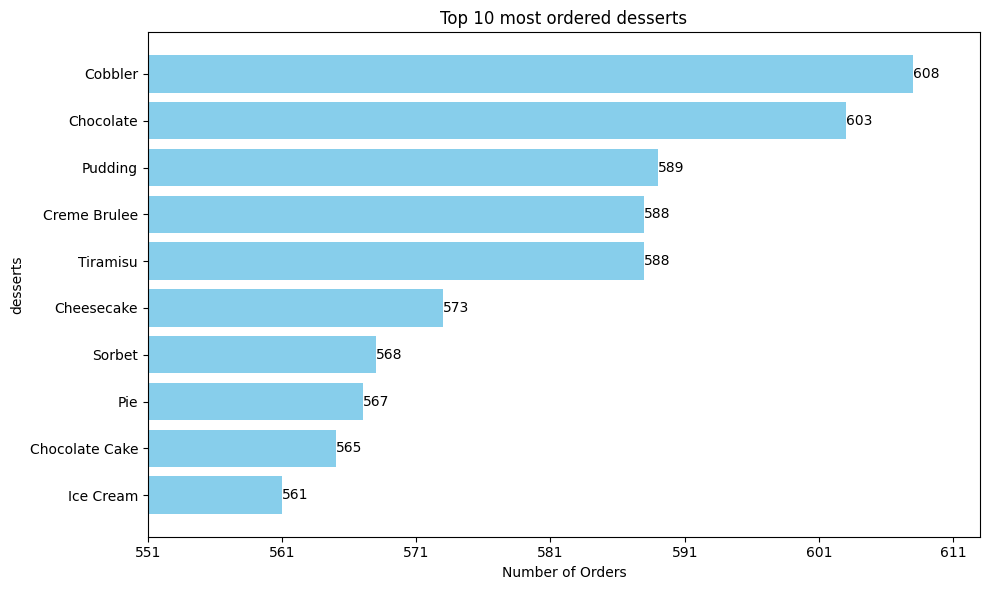

In [53]:
counts = merged_data.groupby("desserts")["order_id"].nunique()
top = counts.nlargest(10)

# New Data
states_new = top.index.tolist()
desserts = top.tolist()

# Reverse the order of new data
states_new = states_new[::-1]
desserts = desserts[::-1]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(states_new, desserts, color='skyblue')
plt.title('Top 10 most ordered desserts')
plt.xlabel('Number of Orders')
plt.ylabel('desserts')

# Set x-axis limits to start at 100
plt.xlim(min(desserts) - 10, max(desserts) + 5)  # Adjust the upper limit based on your data

# Display numbers on each bar
for bar, order in zip(bars, desserts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(order), ha='left', va='center')

# Set x-axis ticks to show only whole numbers
plt.xticks(range(min(desserts) - 10, max(desserts) + 5, 10))

# Show the plot
plt.tight_layout()
plt.show()

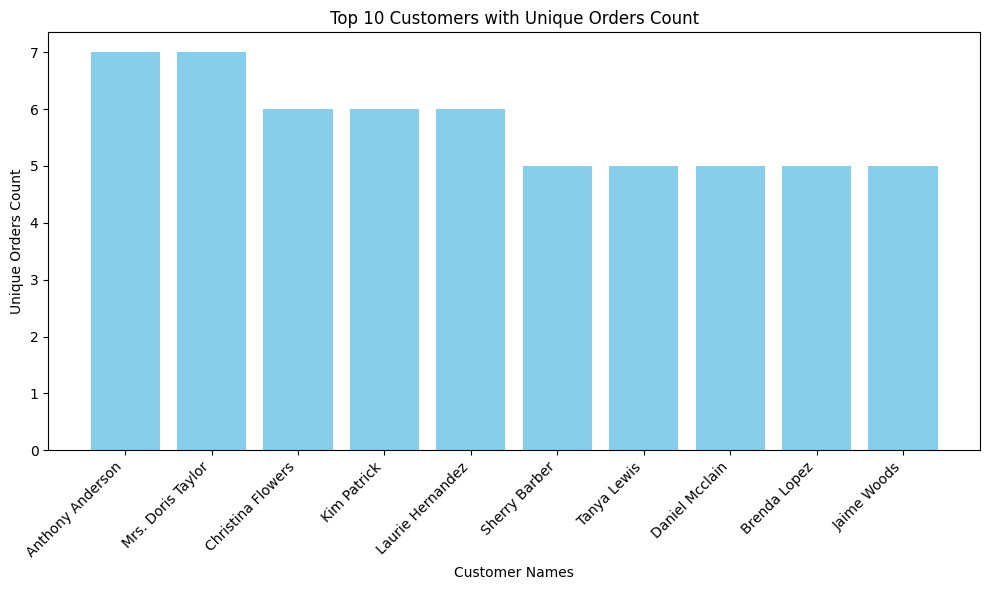

In [56]:
df = merged_data
# Find the top 10 customers with the most unique order_ids
top_10_customers_unique_orders = df.groupby('customer_id')['order_id'].nunique().nlargest(10)
# Extract rows for the top 10 customers with the most unique order_ids
top_10_customers_unique_orders_info = df[df['customer_id'].isin(top_10_customers_unique_orders.index)][['customer_id', 'order_id']]
# Count the unique order_ids for each customer
unique_orders_count = top_10_customers_unique_orders_info.groupby('customer_id')['order_id'].nunique().reset_index(name='unique_orders_count')
# Merge with the original DataFrame to get additional information
merged_info = unique_orders_count.merge(df[['customer_id', 'name', 'email', 'phone_number', 'order_id']], on='customer_id')
# Drop duplicates based on 'customer_id'
unique_merged_info = merged_info.drop_duplicates(subset='customer_id')
# Sort by the count of unique order_ids in descending order
unique_merged_info_sorted = unique_merged_info.sort_values(by='unique_orders_count', ascending=False)
# Display the information for the top 10 customers with unique order_ids and the count of unique orders
unique_merged_info_sorted[['customer_id', 'name', 'email', 'phone_number', 'unique_orders_count']]

names = unique_merged_info_sorted['name']
unique_orders_count = unique_merged_info_sorted['unique_orders_count']

# Extracting data for the bar graph
names = unique_merged_info_sorted['name']
unique_orders_count = unique_merged_info_sorted['unique_orders_count']
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(names, unique_orders_count, color='skyblue')
plt.xlabel('Customer Names')
plt.ylabel('Unique Orders Count')
plt.title('Top 10 Customers with Unique Orders Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
# Display the plot
plt.show()

# Findings:

One significant observation from our analysis is the absence of timestamp data in the restaurant's records. Incorporating dates into the dataset would immensely benefit the establishment in tracking and analyzing revenue trends over specific periods. The inclusion of date information facilitates an understanding of sales patterns, allowing for insightful analyses such as monthly or seasonal revenue assessments. Recommending the addition of date-related information to the dataset aligns with best practices in data analytics, enhancing the restaurant's ability to derive meaningful information and make informed decisions based on a more comprehensive understanding of their business dynamics.

# References:
Used the provided files called customer_demographics.yaml, customer_statistics.csv, orders.csv for our data. Used python3, pandas, and sql for data manipulation. Used matplotlib for the bar graph representaion of our data. VS Studio and GitHub for coding on. Slack and zoom for team collaboration.
Used ChatGPT for help coding, finding/fixing errors, and writing.